In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #For displaying all the columns of dataset

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
import pickle

In [2]:
!pip install openpyxl -q 


In [3]:
def extract_date_hour(dataset, col):
    '''This function will create two columns containing Hours and Minutes
       extracted from `col` column and then dropped it from the dataset.'''
    
    dataset[col + '_hour'] = dataset[col].dt.hour
    dataset[col + '_minute'] = dataset[col].dt.minute
    dataset.drop(col, axis=1, inplace=True)
    
    return dataset

In [ ]:
#Loading Dataset¶


In [8]:
df = pd.read_excel(r'C:\Users\Abdul Khader\Downloads\Data_Train.xlsx')
print(df)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#Exploratory Data Analysis | Feature Engineering


In [15]:
df.isnull().sum().sum()

2

In [ ]:
#As the Nan values are less, so dropping it.¶


In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [ ]:
#Working with Datetime columns
#As the columns are of object type, converting them to datetime

In [18]:
# Changing the datatype from object to datetime. 
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']        = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']    = pd.to_datetime(df['Arrival_Time'])


#Extracting Day and Month.
df['Day']   = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1, inplace=True)


#Extracting Hour and Minute.
df = extract_date_hour(df, 'Arrival_Time')
df = extract_date_hour(df, 'Dep_Time')


In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Duration             10682 non-null  object
 5   Total_Stops          10682 non-null  object
 6   Additional_Info      10682 non-null  object
 7   Price                10682 non-null  int64 
 8   Day                  10682 non-null  int64 
 9   Month                10682 non-null  int64 
 10  Arrival_Time_hour    10682 non-null  int64 
 11  Arrival_Time_minute  10682 non-null  int64 
 12  Dep_Time_hour        10682 non-null  int64 
 13  Dep_Time_minute      10682 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


In [ ]:
#Cleaning the 'Duration' column¶


In [21]:
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h '+ duration[i]

df['Duration'] = duration

In [22]:
df['Hour']   = df['Duration'].apply(lambda x:x.split(' ')[0][0:-1]).astype('int32')
df['Minute'] = df['Duration'].apply(lambda x:x.split(' ')[1][0:-1]).astype('int32')
df.drop('Duration', axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Day                  10682 non-null  int64 
 8   Month                10682 non-null  int64 
 9   Arrival_Time_hour    10682 non-null  int64 
 10  Arrival_Time_minute  10682 non-null  int64 
 11  Dep_Time_hour        10682 non-null  int64 
 12  Dep_Time_minute      10682 non-null  int64 
 13  Hour                 10682 non-null  int32 
 14  Minute               10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ M

In [ ]:
#Working with Categorical Columns


In [24]:
cat = [i for i in df.columns if df[i].dtype == 'O']
cat

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [ ]:
#Working with Airlines columns


In [29]:
px.pie(data_frame=df, values=df['Airline'].value_counts(),
       names=df['Airline'].value_counts().index, hole=0.2)

In [30]:
px.histogram(data_frame=df, x='Airline', y='Price')

In [31]:
px.box(data_frame=df.sort_values('Price',ascending=False), x='Airline', y='Price')

In [ ]:
#Clearly, Jet Airway has the maximum price range.


In [32]:
#Working with Total_Stops
px.histogram(data_frame=df, x='Total_Stops', y='Price', width=600, height=400)


In [36]:
#Cleaning the 'Route' column¶
df['Route_1']=df['Route'].str.split('→').str[0]
df['Route_2']=df['Route'].str.split('→').str[1]
df['Route_3']=df['Route'].str.split('→').str[2]
df['Route_4']=df['Route'].str.split('→').str[3]
df['Route_5']=df['Route'].str.split('→').str[4]


df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)

In [37]:
df['Additional_Info'].value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
#Clearly, this column mostly contains No info, so it is of no use.


In [38]:
#Encoding categorical data
df[cat].head(3)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info


In [39]:
airline = pd.get_dummies(df['Airline'])
source  = pd.get_dummies(df['Source'])
desti   = pd.get_dummies(df['Destination'])
t_stops = pd.get_dummies(df['Total_Stops'])

In [40]:
label = LabelEncoder()
for i in ["Route_1","Route_2","Route_3","Route_4","Route_5"]:
    df[i] = label.fit_transform(df[i])

In [41]:
#Dropping unnesessary columns
df.drop(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Total_Stops'],
       axis=1, inplace=True)

In [42]:
#Merging the cleaned Dataset
data = pd.concat([df, airline, source, desti, t_stops], axis=1)
data.head(2)

,Price,Day,Month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Hour,Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 stop,2 stops,3 stops,4 stops,non-stop
0,3897,24,3,1,10,22,20,2,50,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7662,5,1,13,15,5,50,7,25,2,25,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


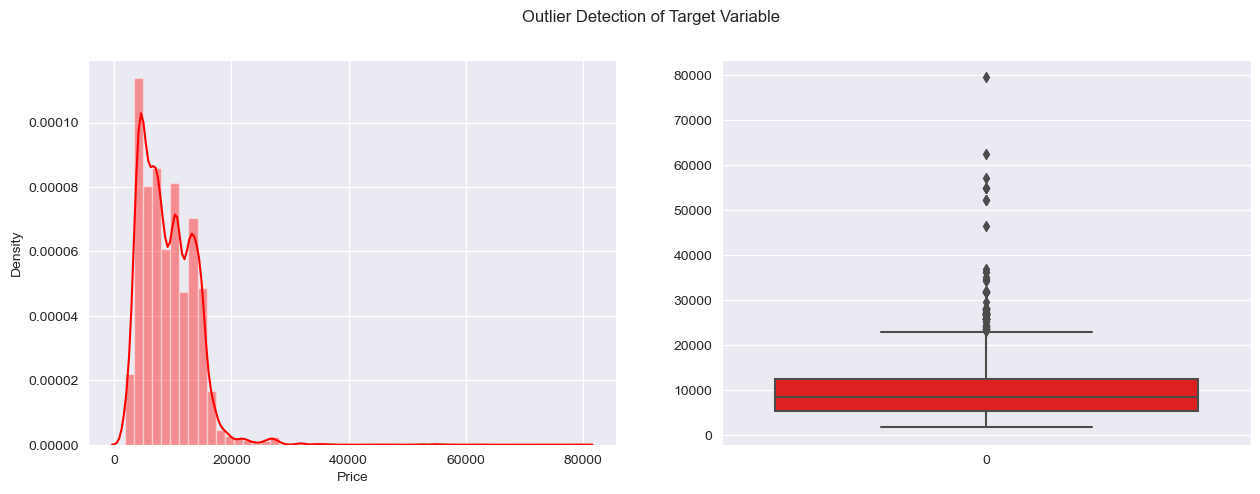

In [43]:
#Outliers Detection
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(data['Price'], color='r', ax=ax[0])
sns.boxplot (data['Price'], color='r', ax=ax[1])
plt.suptitle('Outlier Detection of Target Variable')
fig.show()

In [44]:
data['Price'] = data['Price'].apply(lambda x:df['Price'].median() if x > 40000 else x)

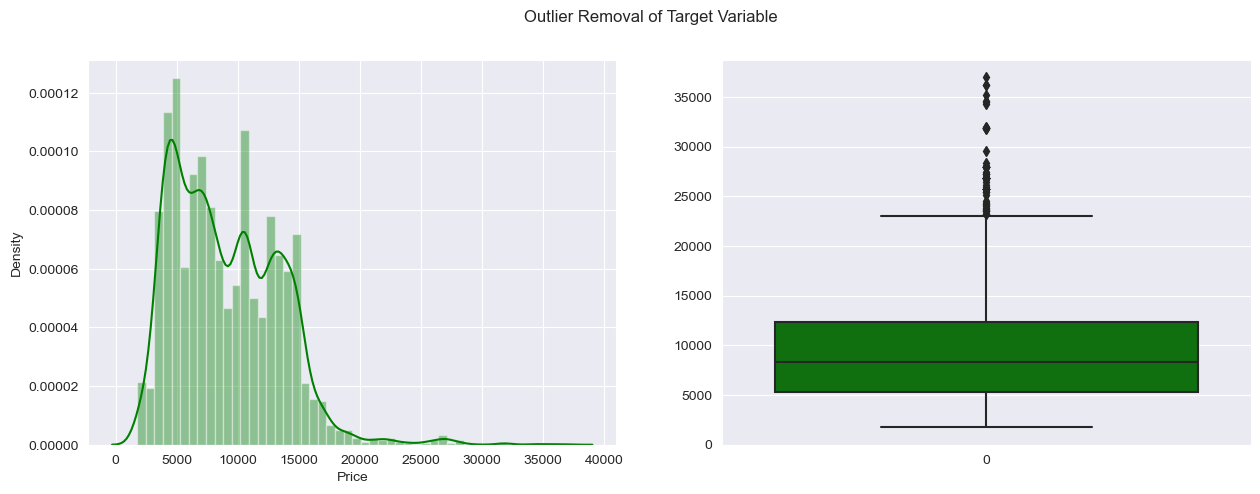

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(data['Price'], color='g', ax=ax[0])
sns.boxplot (data['Price'], color='g', ax=ax[1])
plt.suptitle('Outlier Removal of Target Variable')
fig.show()

In [ ]:
Clearly, the outliers have been removed but, the distribution is still not looking good. Therefore let's see what happens if we perform Log Transformation¶


In [46]:
data['Price'] = np.log(data['Price'])


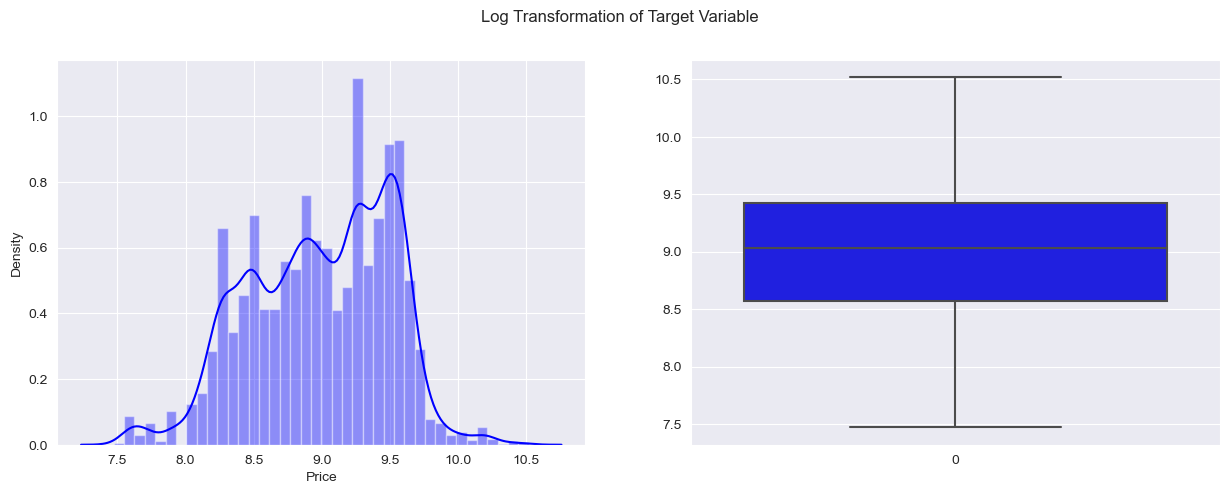

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(data['Price'], color='b', ax=ax[0])
sns.boxplot (data['Price'], color='b', ax=ax[1])
plt.suptitle('Log Transformation of Target Variable')
fig.show()

# Seperating Dependent & Independent Variable¶


In [48]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
#Splitting Train & Test Dataset


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
#Model Training¶
#Linear Regression
#KNeignbors Regressor
#Decision Tree Regressor
#Random Forest Regressor

In [50]:
linear = LinearRegression()
model = linear.fit(X_train, y_train)

print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 73.21%
Testing Score  - 73.0%


In [51]:
KNR = KNeighborsRegressor()
model = KNR.fit(X_train, y_train)

print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 84.62%
Testing Score  - 74.21%


In [52]:
DTR = DecisionTreeRegressor()
model = DTR.fit(X_train, y_train)

print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 97.3%
Testing Score  - 78.63%


In [53]:
RFR = RandomForestRegressor()
model = RFR.fit(X_train, y_train)

print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 96.47%
Testing Score  - 85.75%


# # Clearly, Random Forest is giving best Test Score. Let's select it's parameters using Randomized Search CV.¶


In [54]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=3)]

max_features=['auto','sqrt']

max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_split=[5,10,15,20,25,30]

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [57]:
model = RandomizedSearchCV(estimator=RFR, param_distributions=random_grid, cv=5, verbose=2, n_jobs=-1)
print('Model Training...\n')
model.fit(X_train, y_train)
print('Training Completed !!!')

Model Training...

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Completed !!!


In [58]:
print(f'Training Score - {(model.score(X_train, y_train) * 100).round(2)}%')
print(f'Testing Score  - {(model.score(X_test, y_test) * 100).round(2)}%')

Training Score - 88.93%
Testing Score  - 85.42%


In [59]:
pickle.dump(model, open('model.pkl', 'wb'))